# Lab 8: Define and Solve an ML Problem of Your Choosing

In [19]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [20]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I have chosen the bookReviewDataSet for my sentiment analysis model.
2. I will be predicting the sentiment of the book reviews. The label will be the sentiment score or general category (positive, negative) per every review.
3. This is a supervised learning problem and binary classification problem.
4. The primary feature will be the Review column.
5. This is an important problem because it allows companies to understand customer feedback and satisfaction in order to improve future products, address issues, enhance marking and experience, and automate processes.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [21]:
print(df.describe())

                                                   Review Positive Review
count                                                1973            1973
unique                                               1865               2
top     I have read several of Hiaasen's books and lov...           False
freq                                                    3             993


In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review           1973 non-null   object
 1   Positive Review  1973 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 17.5+ KB
None


In [23]:
print(df.isnull().sum())

Review             0
Positive Review    0
dtype: int64


In [24]:
y = df['Positive Review']
X = df['Review']

X.shape

(1973,)

In [25]:
print('A Negative Review Example: \n\n', X[40])
print('A Positive Review Example: \n\n', X[92])

A Negative Review Example: 

 Man, oh man, I think this is one of the worst books I've ever read.  If I could give The Thanatos Syndrome negative stars, I would!

Seriously, half way through, I came to Amazon to see how bad other people thought it was.  Boy was I shocked to see that almost all of these reviews were positive!

I found the book bizarre, unfocused and poorly written.  The volcabulary repeatedly seems misused.  The plot is not reasonable given the safeguards that US funding agencies have in place with regards to human experimentation.  The physics, engineering, psychology, medical chemistry and biology are uninformed and unrealistic.  Characters are introduced as though they will be important to the outcome, only to have them dissipate.  And so on.

The characters don't even seem like real people.  For example, the main character recognizes his cousin by seeing her ankles - and only her ankles - flashing below a curtain, and yet he is apparently unaware of what degree of c

In [26]:
X.head()

0    This was perhaps the best of Johannes Steinhof...
1    This very fascinating book is a story written ...
2    The four tales in this collection are beautifu...
3    The book contained more profanity than I expec...
4    We have now entered a second time of deep conc...
Name: Review, dtype: object

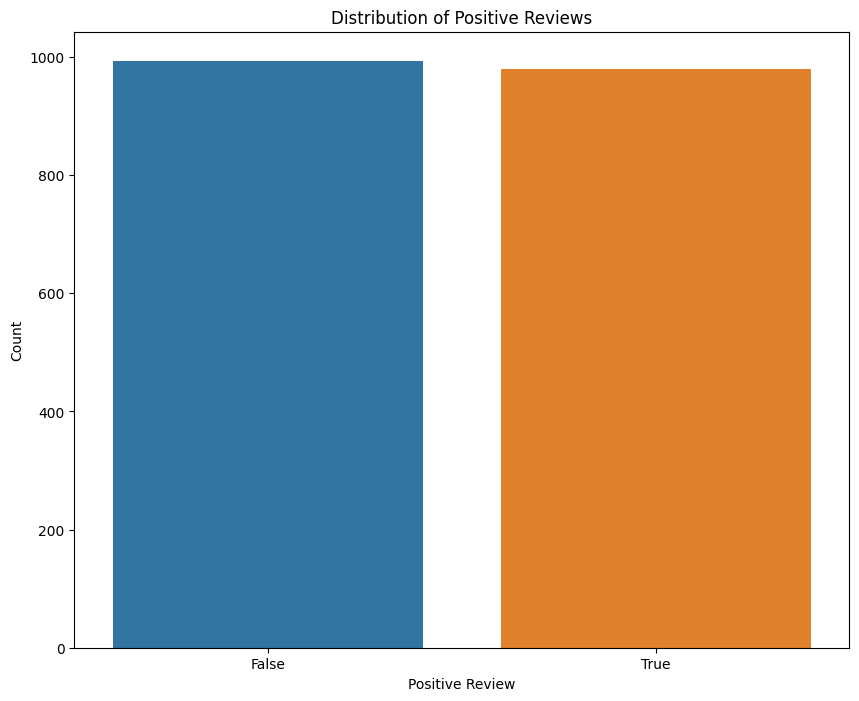

In [27]:
df['Positive Review'] = df['Positive Review'].astype('category')

plt.figure(figsize=(10,8))
sns.countplot(x='Positive Review', data=df)
plt.title('Distribution of Positive Reviews')
plt.xlabel('Positive Review')
plt.ylabel('Count')
plt.show()

In [10]:
pip install nltk


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. No, I do not have a new feature list. There was only one feature to begin with!
2. Some different data preparation techniques that I will use to preapre my data for modeling is text preprocessing (tokenization, lowercasing, removing punctuation, removing stop words, and stemming). In addition, I will use the TF-IDF Vectorization technique.
3. I will split the data into train and test sets and apply TF-IDF vecotrization to transform the data into numerical features.
4. I will use an XGBook classifier on the training data.
5. I will use cross-validation to evaluate the model's performance on the training data and use accuracy, precision,recall, and F1 score to assess performance. Then, I will tune hyperparameters and may use ensemble methods to improve the model.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [28]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns


In [29]:
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Review'] = df['Review'].apply(preprocess_text)
print(df['Review'].head())

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    perhaps best johannes steinhoffs book since de...
1    fascinating book story written form numerous l...
2    four tale collection beautifully composed art ...
3    book contained profanity expected read book ri...
4    entered second time deep concern science math ...
Name: Review, dtype: object


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [30]:
vectorizer = TfidfVectorizer(max_features = 3000)
X = vectorizer.fit_transform(df['Review']).toarray()
y = df['Positive Review']


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=1234)

In [33]:
print(df['Positive Review'].value_counts())

False    993
True     980
Name: Positive Review, dtype: int64


In [34]:
pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [35]:
import xgboost as xgb
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average = 'weighted')
train_recall = recall_score(y_train, y_train_pred, average = 'weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print(f'Train Accuracy: {train_accuracy}')
print(f'Train Precision: {train_precision}')
print(f'Train Recall: {train_recall}')
print(f'Train F1: {train_f1}')

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:17:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "enable_cateogrical", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Train Accuracy: 0.9939148073022313
Train Precision: 0.9939603560070147
Train Recall: 0.9939148073022313
Train F1: 0.9939153137604336


Test Accuracy: 0.7732793522267206
Test Precision: 0.7733561703633892
Test Recall: 0.7732793522267206
Test F1: 0.7729996067577979


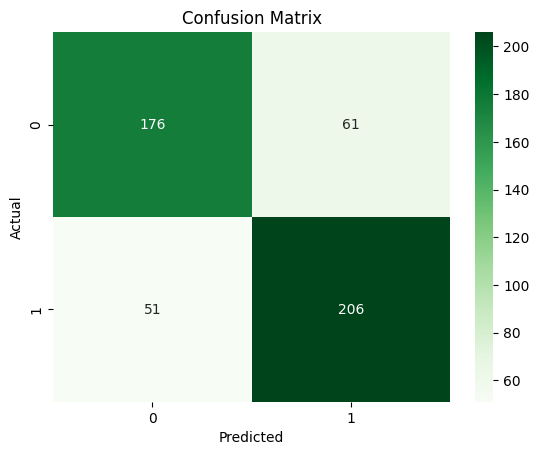

In [36]:
y_test_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average = 'weighted')
test_recall = recall_score(y_test, y_test_pred, average = 'weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1: {test_f1}')

conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [50, 100],
    'learning_rate' : [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:18:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "enable_cateogrical", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:18:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "enable_cateogrical", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:18:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "enable_cateogrical", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [00:18:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "enable_cateogrical", "use_label_encoder" } are not used.

  w

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


Best Test Accuracy: 0.742914979757085
Best Test Precision: 0.7431814926977467
Best Test Recall: 0.742914979757085
Best Test F1: 0.7423591168199548


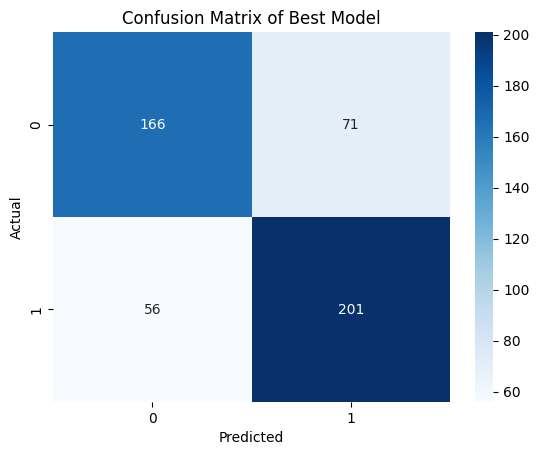

In [39]:
y_test_pred_best = best_model.predict(X_test)

best_test_accuracy = accuracy_score(y_test, y_test_pred_best)
best_test_precision = precision_score(y_test, y_test_pred_best, average = 'weighted')
best_test_recall = recall_score(y_test, y_test_pred_best, average = 'weighted')
best_test_f1 = f1_score(y_test, y_test_pred_best, average='weighted')

print(f'Best Test Accuracy: {best_test_accuracy}')
print(f'Best Test Precision: {best_test_precision}')
print(f'Best Test Recall: {best_test_recall}')
print(f'Best Test F1: {best_test_f1}')

conf_matrix = confusion_matrix(y_test, y_test_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Best Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()